# 모델을 save 하고 restore 하고 plot 으로 확인 
0. tensorflow_try_helloworld.ipynb 학습 후, 손글씨 숫자로 실습 
1. training 을 많이 시키는데 오히려 5를 6으로 판별하는 것 주목 
2. session 이 유지되는 가운데 실행되는 operaiton 주목  
3. 처음 random 하게 행렬잡아 시작, 효과적인 학습율과 학습횟수 주목 
  
본래의 다음 자료를 참고하여 작성되었습니다 
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
from __future__ import print_function

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./MNIST_data/", one_hot=True)

import tensorflow as tf

c:\winpython36-64bit\python-3.6.1.amd64\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Parameters
learning_rate = 0.001
batch_size = 100
display_step = 1

model_path = "./tmp/model.ckpt"

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
model = multilayer_perceptron(x, weights, biases)
#################################################

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [3]:
# Initializing the variables
init = tf.global_variables_initializer()

# 'Saver' op to save and restore all the variables
saver = tf.train.Saver()

In [4]:
# Running first session
print("Starting 1st session...")
with tf.Session() as sess:
    # Initialize variables
    sess.run(init)

    # Training cycle
    for epoch in range(3):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print( "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost) )
    print("First Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

    # Save model weights to disk
    save_path = saver.save(sess, model_path)
    print("Model saved in file: %s" % save_path)
    
### sess.close()

Starting 1st session...
Epoch: 0001 cost= 206.054655193
Epoch: 0002 cost= 43.514041987
Epoch: 0003 cost= 27.677784168
First Optimization Finished!
Accuracy: 0.9139
Model saved in file: ./tmp/model.ckpt


Starting a session...
INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt
Model restored from file: ./tmp/model.ckpt
Accuracy: 0.9139


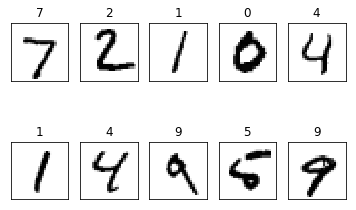

In [6]:
import matplotlib.pyplot as plt
import numpy as np

#####################
# 1 st session 결과 확인 (matplot)
#####################



# Running a new session
print("Starting a session...")



with tf.Session() as sess:
    # Initialize variables
    sess.run(init)

    # Restore model weights from previously saved model
    load_path = saver.restore(sess, model_path)
    print("Model restored from file: %s" % save_path)

    display_step = 1
    
    '''
    labels = sess.run(model,
                      feed_dict={x: mnist.test.images,
                                 y: mnist.test.labels,
                                 keep_prob: 1})
    '''
    labels = sess.run(model, feed_dict={
                                 x: mnist.test.images,
                                 y: mnist.test.labels }  )



    # Test model
    correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval(
        {x: mnist.test.images, y: mnist.test.labels}))




    fig = plt.figure()
    for i in range(10):
        subplot = fig.add_subplot(2, 5, i + 1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('%d' % np.argmax(labels[i]))
        subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                       cmap=plt.cm.gray_r)

    plt.show()



In [7]:
# Running 2nd session
# 2차 세션 시작 +++++++++++++++
print("Starting 2nd session...")
# 노 에러 버젼 #################




with tf.Session() as sess:
    # Initialize variables
    sess.run(init)

    # Restore model weights from previously saved model
    load_path = saver.restore(sess, model_path)
    print("Model restored from file: %s" % save_path)

    # Resume training
    for epoch in range(7):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch + 1), "cost=", \
                "{:.9f}".format(avg_cost))
            
    print("Second Optimization Finished!")
    ######################################

    # Test model
    correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval(
        {x: mnist.test.images, y: mnist.test.labels}))
   
    #########################################
    # Save model weights to disk
    save_path = saver.save(sess, model_path)
    print("Model saved in file: %s" % save_path)

    
#### sess.close()
    


Starting 2nd session...
INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt
Model restored from file: ./tmp/model.ckpt
Epoch: 0001 cost= 19.425302172
Epoch: 0002 cost= 14.367997978
Epoch: 0003 cost= 10.687481070
Epoch: 0004 cost= 8.098985386
Epoch: 0005 cost= 6.122898943
Epoch: 0006 cost= 4.668697373
Epoch: 0007 cost= 3.410577245
Second Optimization Finished!
Accuracy: 0.9379
Model saved in file: ./tmp/model.ckpt


In [18]:
#  문제 :  ??? 아래는 왜 에러를 내는가 ??????????

# Running 2nd session
print("Starting 2nd session...")
# with tf.Session() as sess 빼면 why 에러 ??


sess =  tf.Session() 
init = tf.global_variables_initializer()
sess.run(init)



# Restore model weights from previously saved model
load_path = saver.restore(sess, model_path)
    
print("Model restored from file: %s" % load_path)

# Resume training
for epoch in range(7):
    avg_cost = 0.
    total_batch = int(mnist.train.num_examples / batch_size)
    # Loop over all batches
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and 
        # cost op (to get loss value)
        _, c = sess.run([optimizer, cost], 
                            feed_dict={x: batch_x,
                                       y: batch_y})
        # Compute average loss
        avg_cost += c / total_batch
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch + 1), "cost=", \
            "{:.9f}".format(avg_cost))

        
print("Second Optimization Finished!")

########################################
#주목 : 여기서 session 끝난다
#########################################

# Test model
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print("Accuracy:", accuracy.eval( \
    {x: mnist.test.images, y: mnist.test.labels}))
    
# ???  accuracy.eval 에서 에러가 난다 ############

Starting 2nd session...
INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt
Model restored from file: None
Epoch: 0001 cost= 17.983575578
Epoch: 0002 cost= 12.931374303
Epoch: 0003 cost= 9.591432883
Epoch: 0004 cost= 7.236752746
Epoch: 0005 cost= 5.489937093
Epoch: 0006 cost= 4.029152351
Epoch: 0007 cost= 3.128900279
Second Optimization Finished!


ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

Starting 2nd session  확인.
INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt
Model restored from file: ./tmp/model.ckpt
Accuracy: 0.9379


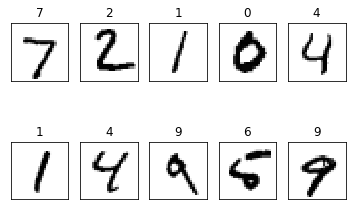

In [8]:
import matplotlib.pyplot as plt
import numpy as np

####################################
# 2차 세션 검토 : 결과 확인 (matplot)
###################################



# Running a new session
print("Starting 2nd session  확인.")



with tf.Session() as sess:
    # Initialize variables
    sess.run(init)

    # Restore model weights from previously saved model
    load_path = saver.restore(sess, model_path)
    print("Model restored from file: %s" % save_path)

    display_step = 1
    
    '''
    labels = sess.run(model,
                      feed_dict={x: mnist.test.images,
                                 y: mnist.test.labels,
                                 keep_prob: 1})
    '''
    labels = sess.run(model, feed_dict={
                                 x: mnist.test.images,
                                 y: mnist.test.labels }  )



    # Test model
    correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval(
        {x: mnist.test.images, y: mnist.test.labels}))




    fig = plt.figure()
    for i in range(10):
        subplot = fig.add_subplot(2, 5, i + 1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('%d' % np.argmax(labels[i]))
        subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                       cmap=plt.cm.gray_r)

    plt.show()

